#                      WORKSHOP 1: ORGANIC DATA GENERATION I

In this first workshop, we will explore the datasets by generating summary statistics and summary visuals, preprocess them to prepare for analysis, and generate new data that will help us understand the predictors of employee performance and satisfaction.     


## About the datasets

The datasets we will use in this workshop series are about current faculty members at Imperial College Business School. There are three CSV files that we will use for our analysis, but also as seeds for generating more data. The end goal is to predict key factors that drive (or hinder) employee performance. We will wrap up by discussing the generalizability of this datasets to contexts outside of the business school and, more generally, outside of academia. 

The three datasets are as follows:
- ** `employee_data.csv` ** is a dataset that contains each faculty member's `department`, `last_name`, `first_name`, Titles (`title1` is a general title, and `title2` is more specific), `personal_summary` (which is the summary written by an individual about him- or herself) and a unique `person_id`.

- ** `employee_publications.csv`** is a dataset that contains `person_id`,`coauthors` (which are the names of all authors on a publication),`title` of the publication, `journal` (which is the name of the journal), `year` of publication and finally, `citations` received by each publication.   

- ** `employee_performance.csv`** is a dataset that contains `person_id`, total `citations` that the person received, `citations_5yr` that a person received in their lifetime, `hindex`, is an index used to describe an author's productivity, `hindex_5yr` is the h-index over the last 5 years, `i10index`, is a google scholar index counting the number of publications with at least 10 citations, `i10index_5yr` is the same measure over the last 5 years.      


## TASK 1: Explore employee_data.csv


- Task 1.1: Read in data
     - Let's begin by reading in ./Data/employee_data.csv and saving it into a Pandas DataFrame named `employees_df`.  
     - You can use pd.read_csv to read in a dataset into a dataframe: [This link will help](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)   
- Task 1.2: How many departments are there?

- Task 1.3: How many people are in each department? Let's create a dictionary, `dept_dict`, where department names are keys and number of employees in each department are values.    

- Task 1.4 _[Optional Task]_: Lets plot a bar chart to visualize the difference between departments. 

<hr>

**_Hint 1_: Improving the look of vertical and horizontal bar charts** 
> If you're not organizing your charts in alphabetical order, its visually more pleasing to have the bars in descending hights from left to right for a bar chart, and from top to bottom for a horizontal bar chart.  

**_Hint 2_: Generating dictionaries**
> To generate a dictionary, first start with an empty dictionary: `dept_dict = {}`, then you can populate the dictionary like this: 
```dept_dict[key_name]=value_for_key
```



In [1]:
import pandas as pd
import numpy as np

# Read datasets/nytkids_yearly.csv into employees_df.
employees_df = pd.read_csv('./Data/employee_data.csv' , encoding='latin1', keep_default_na=False)

# You can uncomment the following line to explore the first few rows of the dataset.
# employees_df.head()

# Counting the number of departments 
unique_depts = np.unique(employees_df.department)

# Counting the number of people per department, and adding it to dept_dict
# Counting the number of people per department
dept_dict={}
for dept in unique_depts:
    dept_dict[dept]=len([x for x in employees_df.department if x in dept])
    


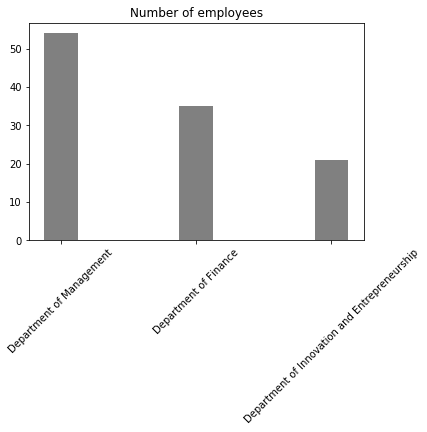

In [2]:
# Visualizing employees per department
# Importing matplotlib

import matplotlib.pyplot as plt
# This makes plots appear in the notebook
%matplotlib inline

# Sorting in descending order
sorted_keys = sorted(dept_dict, key=dept_dict.get, reverse=True)
sorted_vals = [dept_dict[dept] for dept in sorted_keys]

# Creating pos, a list containing indexes of unknown_by_yr
pos = range(len(sorted_keys))

# Plotting the bar chart
plt.bar(pos,  sorted_vals,  width =0.25, color='gray') 

# Setting xticks to have the same `pos` as bars 
plt.xticks(pos, sorted_keys, rotation = 45)

#  Setting a title, and axes labels
plt.title('Number of employees')

## TASK 2: A column for colleagues

We can now generate our first "organic" column. Let's first loop through each row of employees_df (I'll use `department`), and add the number of colleagues, which we will define as the number of people in the focal person's department. Create a new column `colleagues`, and add it to `employees_df`       

<hr>
**_Hint _: Adding a new column to a DataFrame**
- You can add a list (`new_list`) to an existing DataFrame like this:

`
employees_df[col_name]=new_list
`

In [3]:
# Initialize list_of_colleagues
list_of_colleagues=[]

# Loop through employees_df.department and populate list_of_colleagues
for dept in employees_df.department:
    # find the value of key ['dept'] from dept_dict
    list_of_colleagues.append(dept_dict[dept])
    
# Add list of colleagues to employees_df    
employees_df['colleagues']=list_of_colleagues
    

## TASK 3: A proxy for employee enthusiasm
The `personal_summary` column in `employees_df` is usually a piece of text that every faculty member writes about himself or herself. Can we measure employee enthusiasm for the job by the size of the text? the sentiment of the text? Before we implement this, lets take a few minutes to think about how good this proxy actually is.  


#### Task 3A: Counting the number of words

- Let's first loop through each `personal_summary` in `employees_df` and count the number of words. Save this as a list, `tot_words`
- Next, let's refine our definition a little and remove common words, _stopwords_, from tot_words 

<hr>
**_Hint 1_: Counting** Do a quick google search on `nltk.word_tokenize(some_str)`, and compare this to len(some_str). What does each do? Which is more applicable in this context? 

**_Hint 2_: Stop words** you can get a list of stopwords using  `stopwords.words('english')`

In [4]:
import nltk
from nltk.corpus import stopwords


# Initialize `tot_words`
tot_words=[]

# Loop through `personal_summary` and populate tot_words
for s in employees_df.personal_summary:
    word_list = nltk.word_tokenize(s)
    refined_list = [word for word in word_list if word not in stopwords.words('english')]
    tot_words.append(len(refined_list))

# Add tot_words to employees_df as a column labelled `summary_length`   
employees_df['summary_length'] = tot_words   

#### Task 3B [_optional_]: Sentiment of the summary

- Using the SentimentIntensityAnalyzer from the nltk toolbox, we will analyze the polarity (i.e., positiveness or negativeness) of all words in each summary, excluding stop words. Using this, we will generate a new column, `summary_positivity`, which is measured as num_positive_words/(num_pos_words+num_negative_words). We will use a nested for-loop using the following steps:

> - for each summary, we will extract the list of words, then remove stop words. Let's call this `refined_list`
> - Then, for each word in `refined_list`, we will examine polarity using SentimentIntensityAnalyzer()
> - If the positive polarity of the word > the negative polarity of the word, we will say this is a positive words. If the positive polarity of the word is < the negative polarity, we will say this is a negative word. Otherwise, we will deem it to be neutral.
> - We will then use the total number of positive and negative words to calculate the extent of positivity, and append that value the list `summary_positivity` 

- Check if the summary_sentiment is correlated to summary_length. What is the score? What does this mean? Specifically, what do they measure in common and what do they capture differently? 

<hr>

**_Hint _**: To SentimentIntensityAnalyzer, first import the module:

`
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
`

Then, you can check the polarity of a word using code like this:


`
sent = sid.polarity_scores('happy')

`

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

summary_positivity=[]
for s in employees_df.personal_summary:
    word_list = nltk.word_tokenize(s)
    refined_list = [word for word in word_list if word not in stopwords.words('english')]
    pos_words=0
    neg_words=0
    neu_words=0
    for word in refined_list:
        sent = sid.polarity_scores(word)
        if  sent['pos'] > sent['neg']:
            pos_words+=1
        elif sent['pos'] < sent['neg']:
            neg_words+=1
        else:
            neu_words+=1
    numerator = pos_words
    denominator = pos_words+neg_words+neu_words
    denominator = max(denominator,1)  # to avoid dividing by 0
    sent_score = numerator/float(denominator)       
    summary_positivity.append(sent_score)

employees_df['summary_positivity'] = summary_positivity     

# Checking the correlation coefficient
np.corrcoef(tot_words, summary_positivity)

array([[ 1.        ,  0.16774327],
       [ 0.16774327,  1.        ]])

## TASK 4: Does enthusiasm vary by department?
We will now explore if and how enthusiasm varies by department, by appending mean values and standard deviations of our enthusiasm proxies (`summary_length` and, if you worked on it, `summary_positivity`) to the `dept_dict`. 


In [6]:
# This function returns all indices of an item (item) from within a (list_of_items). 
def locate_in_list(list_of_items,element):
    item_idx= [i for i, x in enumerate(list_of_items) if x == element]
    return(item_idx)

# Initializing the new department dictionary, dept_dict2
dept_dict2={}

for dept in dept_dict.keys():
    dept_idx = locate_in_list(list(employees_df.department), dept)
    summ_lens = [employees_df.summary_length[x] for x in dept_idx]
    summ_senti = [employees_df.summary_positivity[x] for x in dept_idx]
    enthusiasm_stats = [('mean_summ_length', np.mean(summ_lens)), ('std_summ_length',np.std(summ_lens)), ('mean_summ_senti', np.mean(summ_senti)),('std_summ_senti', np.std(summ_senti))]
    dept_dict2[dept]= enthusiasm_stats
    
    

#### Task 4B [_optional_]: Visualizing enthusiasm at the department level. 
A boxplot works well here because we have multiple values (1 for each employee) per department, and a boxplot will display the distribution of the data. This is important, as it will allow us to see the extent (or lack) of variablility in sentiments. 

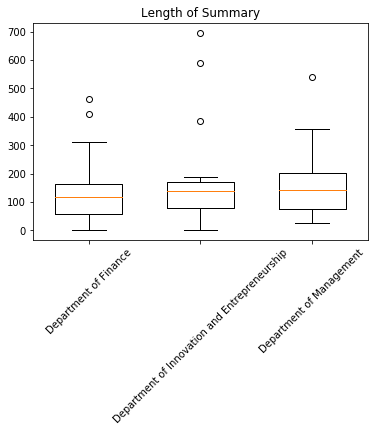

In [7]:

# First, generating the values on the x-axis and saving them in X AND generating the values in each boxplot (bp), and saving them in bp
X=[]
bp_len=[]
bp_senti=[]
for dept in dept_dict.keys():
    dept_idx = locate_in_list(list(employees_df.department), dept)
    X.append(dept)
    bp_len.append([employees_df.summary_length[x] for x in dept_idx])
    bp_senti.append([employees_df.summary_positivity[x] for x in dept_idx])
    
# Plotting boxplot for length of summary
plt1 = plt.boxplot(bp_len, positions =  pos, widths = 0.6)

# Setting xticks
plt.xticks(pos, X, rotation = 45)

#  Setting a title, and axes labels
plt.title('Length of Summary')
plt.show()
    

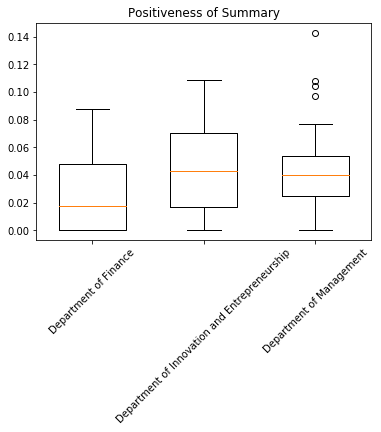

In [8]:
# Plotting boxplot for positivity of summary
plt2 = plt.boxplot(bp_senti, positions = pos, widths = 0.6)

# Setting xticks
plt.xticks(pos, X, rotation = 45)

#  Setting a title, and axes labels
plt.title('Positiveness of Summary')
plt.show()
    

## TASK 5: Guessing genders from names
Research has shown that workplace diversity is an important determinant of individual and origanizational performance. We will use the detector module from the gender_guesser package, which you can read more about here: https://pypi.python.org/pypi/gender-guesser/  

The following steps will help:
- Import gender_guesser
- Initialize an empty list, `employee_gender`
- Loop through each first_name is employees_df, and guess the gender. 
    - If the name is female or mostly_female, append `female` to employee_gender
    - If the name is male or mostly_male, append `male`
    - Otherwise, append `neutral`

In [9]:
# Importing gender_guesser
import gender_guesser.detector as gender
d = gender.Detector()

# Trying out gender guesser to see how it works
#d.get_gender('Dmitry')

# Intializing employee_gender list
employee_gender=[]

# Looping through first names and getting gender. Appending to employee_gender
for fname in employees_df.first_name:
    gen = d.get_gender(fname)
    if gen in ['female', 'mostly_female']:
        employee_gender.append('female')
    elif gen in ['male', 'mostly_male']:
        employee_gender.append('male')
    else:
        employee_gender.append('neutral')
        
# adding employee_gender to employees_df
employees_df.gender = employee_gender 


## TASK 6 [_Optional_]: Genders by department
This task is quite similar to what we did in Task 4. We will create three lists: `dept_name`,`males_in_dept`, `females_in_dept`. We will use the following steps:
> - Initialize the three lists, where dept_name contains names of departments, and males_in_dept and females_in_dept are both empty.
> - Loop through the departments and, for each department, count the number of males and females.
> - Append the gender stats to the lists.

In [10]:
dept_name = list(dept_dict.keys())
males_in_dept=[]
females_in_dept=[]
for dept in dept_name:
    dept_idx = locate_in_list(list(employees_df.department), dept)
    num_males = len([x for x in dept_idx if employees_df.gender[x]=='male' ])
    num_females = len([x for x in dept_idx if employees_df.gender[x]=='female'])
    males_in_dept.append(num_males)
    females_in_dept.append(num_females)

#### TASK 6B [_Optional_]: Visualizing genders
A good way to visualize this the differences in gender composition across departments is using a grouped bar chart. This type of chart is good for displaying _variations_ across entities while also _comparing_ two or more groups.

The idea is simple -- grouped bar charts are two or more bar charts, with bars with positioned side by side. Specifically, if we have a bar chart for males with pos_m and width = 0.25, all we need to do is set a second bar chart for females with pos_f = pos_m + 0.25. The following steps will help:

>- Set pos_m to be the same as pos from the task 1 (**_Hint** for 3 bars, pos can simply be [1,2,3]_)
>- Create a new list pos_f, where each element in pos_f = each element in pos_m + 0.25.
>- Call the plt.bar function for males_in_dept and again for females_in_dept
>- Add the relevent tick labels, axes labels and title.

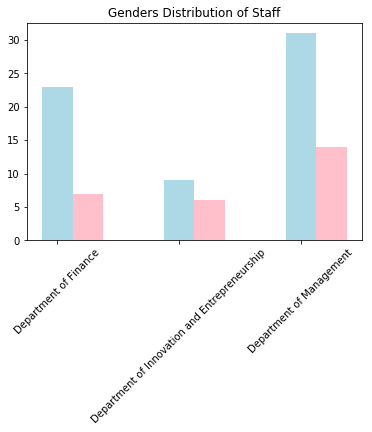

In [11]:
# Setting pos_m to be the same as pos from task 1
pos_m=pos

# Creating a new list pos_f, where each element in pos_f = each element in pos_m + 0.25.
pos_f = [p + 0.25 for p in pos_m]

# Calling the plt.bar function for males_by_yr
plt.bar(pos_m,  males_in_dept,  width = 0.25, color='lightblue') 

# Calling the plt.bar function for females_by_yr
plt.bar(pos_f,  females_in_dept,  width = 0.25, color='pink') 

# Adding the relevent tick labels, Axes labels and Chart Title 
plt.xticks(pos_m,dept_name, rotation = 45)
plt.title('Genders Distribution of Staff')

## TASK 7: Ethnic Distribution of Employees
We'll use the pred_wiki_ln module from the `ethnicolr` package to guess the enthnicity of employees from their last names. You can read more about here: https://pypi.python.org/pypi/ethnicolr.

The module does the work for you! You give it a DataFrame , and the name of the column containing the last names, and it will automatically generate an ethnicity column (labelled `race`). 

The race column is quite specific (e.g., it will give output like: GreaterEuropean,WestEuropean,French). Since we do not have many employees, we will use a more general definition, which contains only the first descriptor (i.e., GreaterEuropean in this case). To do this, we will loop through the race column, and create a new race column (`ethnicity`). 

<hr>
**_Hint _**: you may find the string operation, split, quite handy here. It works like this: 

`
x = ‘blue,red,green’
x.split(“,”)
`

and you can read more here:
http://www.pythonforbeginners.com/dictionary/python-split




In [12]:
from ethnicolr import pred_wiki_ln
pred_wiki_ln(employees_df, 'last_name')

ethnicity=[]
for r in employees_df.race:
    ethnic_list = r.split(",")
    ethnicity.append(ethnic_list[0])
    
employees_df.ethnicity = ethnicity    
    

Using TensorFlow backend.


Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


#### TASK 7B [_Optional_]: Visualizing Ethnic Distributions

By now, you have probably heard -- and maybe even more than once -- that pie charts are bad and that you should avoid them. But I like them. They are simple and, when there aren't too many groups, quite easy to understand. Let's represent the ethnic distribution of employees (across all departments) using a pie chart and let's discuss the good (and the bad).

<hr>
**_Hint _**: you may find the `Counter` module from the `collections` package quite useful. It works like this: 

`
my_list=['A', 'A', 'A', 'B']
cntr_dict=Counter(my_list)
labels = list(cntr_dict.keys())
sizes=[]
for l in labels:
    sizes.append(cntr_dict[l])
`

You can read more here: https://docs.python.org/3/library/collections.html#collections.Counter

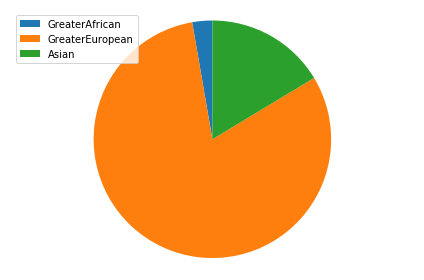

In [13]:
from collections import Counter

my_list = employees_df.ethnicity
cntr_dict=Counter(my_list)
labels = list(cntr_dict.keys())
sizes=[]
for l in labels:
    sizes.append(cntr_dict[l])
    
patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

## TASK 8: Let's save our DataFrame
Our employee DataFrame(`employees_df`) contains a lot of information. We can store the DataFrame using to_pickle. To read more: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_pickle.html

In [14]:
employees_df.to_pickle('./Data/employees_df.pkl')